In [5]:
import pandas as pd

# Load the dataset
file_path = 'bank-full.csv'
df = pd.read_csv(file_path, sep=';')

# Shsowing the first 5 columns
df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [13]:
import numpy as np
import pandas as pd

# Load the dataset
file_path = 'bank-full.csv'
df_raw = pd.read_csv(file_path, sep=';')

# Replace 'unknown' with NaN
df_raw.replace('unknown', np.nan, inplace=True)

# Convert object columns to category type
for col in df_raw.select_dtypes(include='object').columns:
    df_raw[col] = df_raw[col].astype('category')

# Show missing values before cleaning
missing_values_before = df_raw.isnull().sum()
print("📌 Missing Values Before Cleaning:\n")
print(missing_values_before)
print("\nTotal missing values:", missing_values_before.sum())
print("\n" + "="*60 + "\n")

# Fill missing values
for col in df_raw.columns:
    if df_raw[col].dtype.name == 'category':
        df_raw[col] = df_raw[col].fillna(df_raw[col].mode()[0])
    elif df_raw[col].dtype in ['int64', 'float64']:
        df_raw[col] = df_raw[col].fillna(df_raw[col].median())

# Show missing values after cleaning
missing_values_after = df_raw.isnull().sum()
print("✅ Missing Values After Cleaning:\n")
print(missing_values_after)
print("\nTotal missing values:", missing_values_after.sum())
print("\n" + "="*60 + "\n")

# Age statistics
age_summary = df_raw['age'].describe()
print("📊 Age Summary Statistics:\n")
print(age_summary)
print("\n" + "="*60 + "\n")

# Job distribution
job_distribution = df_raw['job'].value_counts()
print("👔 Job Distribution:\n")
print(job_distribution)
print("\n" + "="*60 + "\n")

# Marital status distribution
marital_distribution = df_raw['marital'].value_counts()
print("💍 Marital Status Distribution:\n")
print(marital_distribution)
print("\n" + "="*60 + "\n")

# Save cleaned CSV
cleaned_csv_path = 'cleaned_bank_full.csv'
df_raw.to_csv(cleaned_csv_path, index=False)
print(f"📁 Cleaned dataset saved to: {cleaned_csv_path}")




📌 Missing Values Before Cleaning:

age              0
job            288
marital          0
education     1857
default          0
balance          0
housing          0
loan             0
contact      13020
day              0
month            0
duration         0
campaign         0
pdays            0
previous         0
poutcome     36959
y                0
dtype: int64

Total missing values: 52124


✅ Missing Values After Cleaning:

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

Total missing values: 0


📊 Age Summary Statistics:

count    45211.000000
mean        40.936210
std         10.618762
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64


👔 Job Distribution:

job
blue-collar  

In [14]:
import pandas as pd

# Load the cleaned CSV file
file_path = 'cleaned_bank_full.csv'
df = pd.read_csv(file_path)
df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,cellular,5,may,261,1,-1,0,failure,no
1,44,technician,single,secondary,no,29,yes,no,cellular,5,may,151,1,-1,0,failure,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,cellular,5,may,76,1,-1,0,failure,no
3,47,blue-collar,married,secondary,no,1506,yes,no,cellular,5,may,92,1,-1,0,failure,no
4,33,blue-collar,single,secondary,no,1,no,no,cellular,5,may,198,1,-1,0,failure,no


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# Copy the dataset to preserve original
df_processed = df.copy()

# Encode categorical features using LabelEncoder
label_encoders = {}
for column in df_processed.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_processed[column] = le.fit_transform(df_processed[column])
    label_encoders[column] = le

# Split data into features and target
X = df_processed.drop('y', axis=1)
y = df_processed['y']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize classifiers
log_reg = LogisticRegression(max_iter=1000)
tree_clf = DecisionTreeClassifier(random_state=42)

# Train classifiers
log_reg.fit(X_train, y_train)
tree_clf.fit(X_train, y_train)

# Predict and evaluate
log_reg_preds = log_reg.predict(X_test)
tree_preds = tree_clf.predict(X_test)

log_reg_acc = accuracy_score(y_test, log_reg_preds)
tree_acc = accuracy_score(y_test, tree_preds)

log_reg_report = classification_report(y_test, log_reg_preds, output_dict=True)
tree_report = classification_report(y_test, tree_preds, output_dict=True)

# Create a nicely formatted comparison table
comparison_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-score'],
    'Logistic Regression': [
        round(log_reg_acc * 100, 2),
        round(log_reg_report['weighted avg']['precision'] * 100, 2),
        round(log_reg_report['weighted avg']['recall'] * 100, 2),
        round(log_reg_report['weighted avg']['f1-score'] * 100, 2)
    ],
    'Decision Tree': [
        round(tree_acc * 100, 2),
        round(tree_report['weighted avg']['precision'] * 100, 2),
        round(tree_report['weighted avg']['recall'] * 100, 2),
        round(tree_report['weighted avg']['f1-score'] * 100, 2)
    ]
})

# Display comparison table
print("\nModel Performance Comparison:\n")
print(comparison_df.to_string(index=False))



Model Performance Comparison:

   Metric  Logistic Regression  Decision Tree
 Accuracy                89.31          86.58
Precision                87.46          86.79
   Recall                89.31          86.58
 F1-score                87.56          86.68


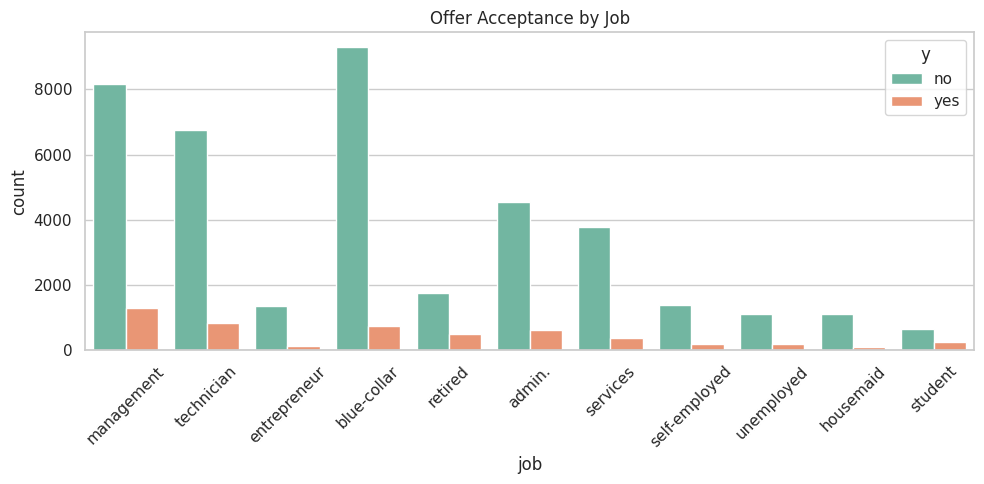

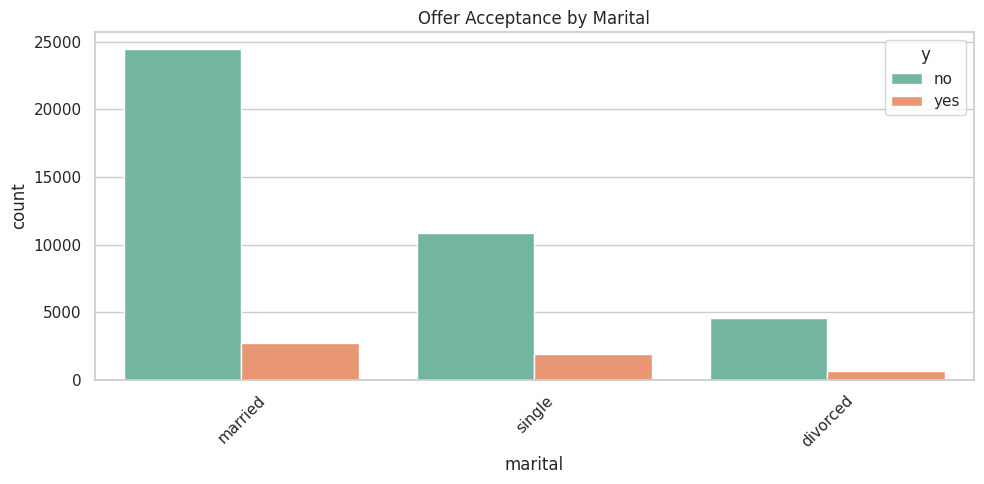

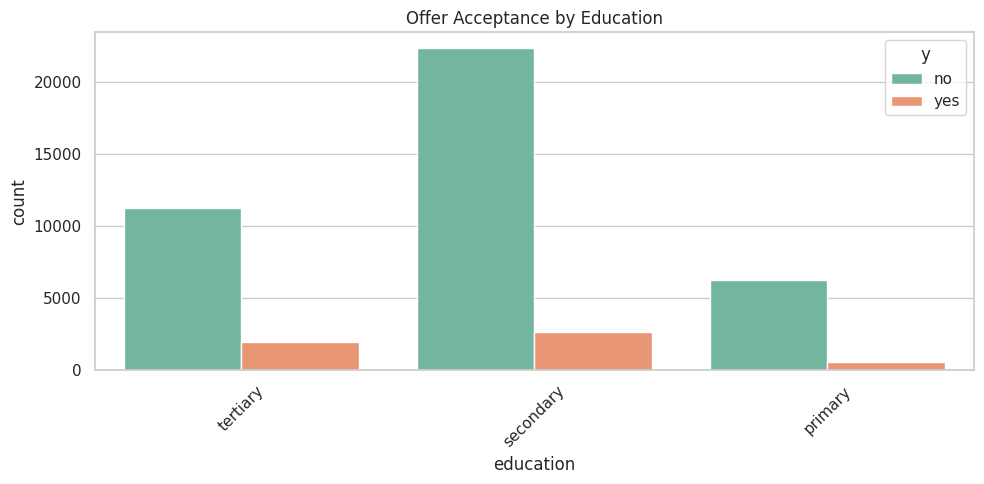

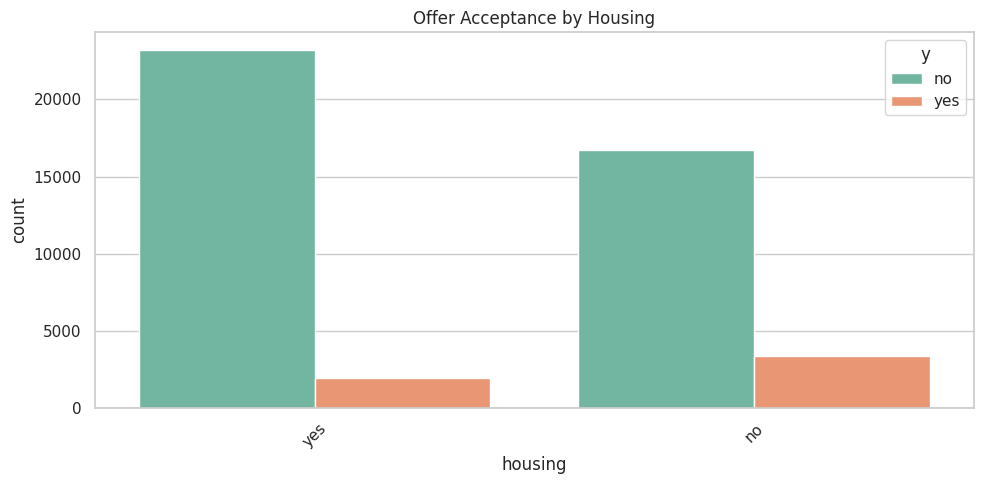

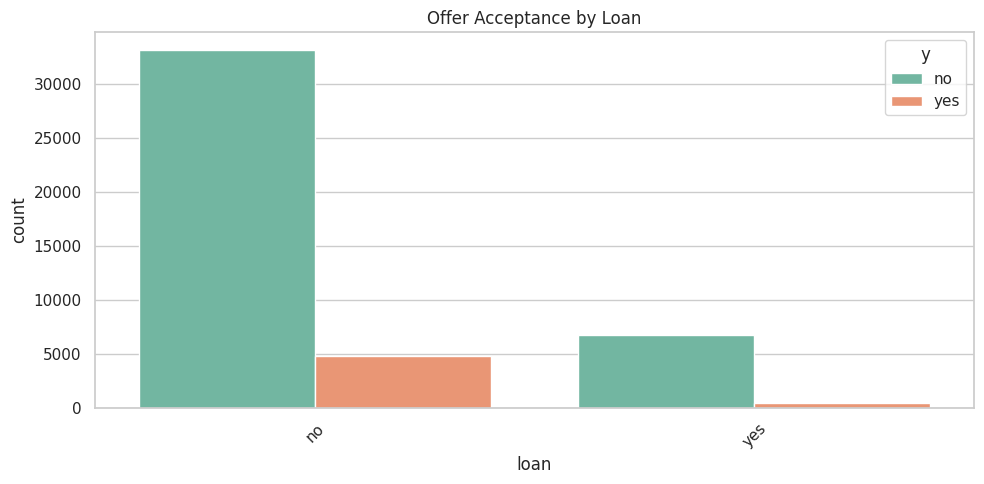

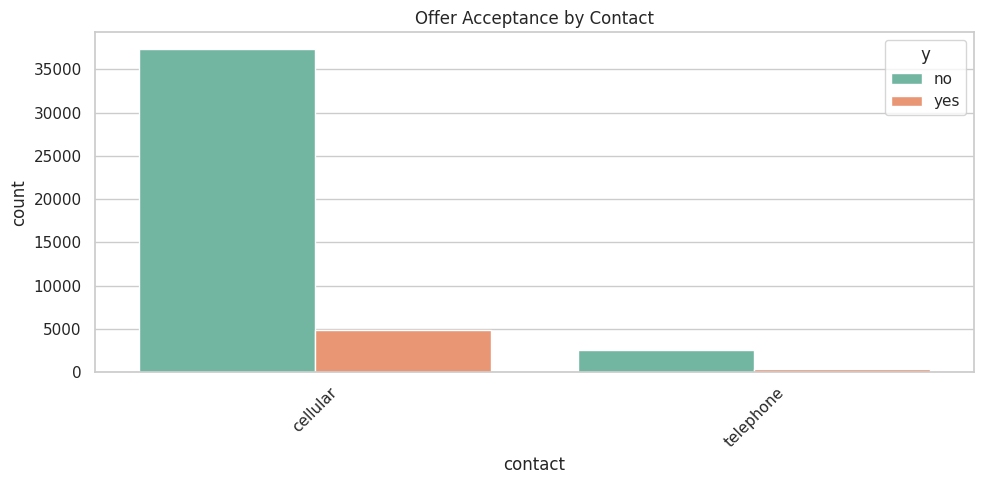

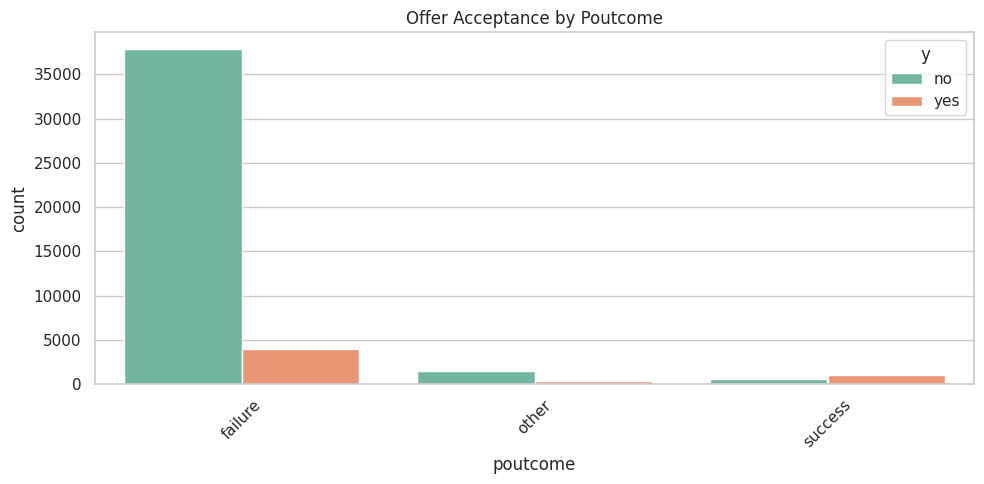

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Decode the target variable to 'yes'/'no' for easier understanding
df['y'] = label_encoders['y'].inverse_transform(y)

# List of important categorical features to analyze
features = ['job', 'marital', 'education', 'housing', 'loan', 'contact', 'poutcome']

# Set Seaborn style
sns.set(style='whitegrid')

# Plot one by one
for feature in features:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x=feature, hue='y', palette='Set2')
    plt.title(f'Offer Acceptance by {feature.capitalize()}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
